# Number of parameters v.s. Generalization

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [4]:
torch.manual_seed(1)

## Datasets

### MNIST

In [3]:
# The training data
mnist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# The testing data
mnist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## Training Function

In [4]:
def train(args, model, train_loader, loss_func, optimizer, epoch):
    model.train()
    loss = None
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(output.data, 1)
        correct += (predicted == target).sum().item()

        if batch_idx % args["log_interval"] == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )
    return correct / len(train_loader.dataset), loss.item()

## Testing Function

In [5]:
def test(model, loss_func, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_func(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    return correct / len(test_loader.dataset), test_loss

## 10 Models

In [5]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(784, 800)
        self.fc2 = nn.Linear(800, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.fc1 = nn.Linear(784, 40)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
class Model5(nn.Module):
    def __init__(self):
        super(Model5, self).__init__()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
class Model6(nn.Module):
    def __init__(self):
        super(Model6, self).__init__()
        self.fc1 = nn.Linear(784, 240)
        self.fc2 = nn.Linear(240, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
class Model7(nn.Module):
    def __init__(self):
        super(Model7, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
class Model8(nn.Module):
    def __init__(self):
        super(Model8, self).__init__()
        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
class Model9(nn.Module):
    def __init__(self):
        super(Model9, self).__init__()
        self.fc1 = nn.Linear(784, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
class Model10(nn.Module):
    def __init__(self):
        super(Model10, self).__init__()
        self.fc1 = nn.Linear(784, 4000)
        self.fc2 = nn.Linear(4000, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [16]:
batch_size = 600

mnist_train_dataloader = DataLoader(
    mnist_training_data, batch_size=batch_size, shuffle=True
)
mnist_test_dataloader = DataLoader(mnist_test_data, batch_size=batch_size)

In [17]:
training_acc_arr = []
training_loss_arr = []
testing_acc_arr = []
testing_loss_arr = []

In [18]:
args = {"log_interval": 200, "lr": 1e-3, "epochs": 1}

In [15]:
models = [
    Model1(),
    Model2(),
    Model3(),
    Model4(),
    Model5(),
    Model6(),
    Model7(),
    Model8(),
    Model9(),
    Model10(),
]

In [20]:
idx = 1
for model in models:

    print("Model" + str(idx))
    idx += 1

    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args["lr"])

    training_acc, training_loss = 0, 0
    testing_acc, testing_loss = 0, 0
    for epoch in range(1, args["epochs"] + 1):
        training_acc, training_loss = train(
            args, model, mnist_train_dataloader, loss_func, optimizer, epoch
        )
        testing_acc, testing_loss = test(model, loss_func, mnist_test_dataloader)
    training_acc_arr.append(training_acc)
    training_loss_arr.append(training_loss)
    testing_acc_arr.append(testing_acc)
    testing_loss_arr.append(testing_loss)

Model1
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298656

Test set: Average loss: 0.0017, Accuracy: 8052/10000 (81%)

Model2
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318975

Test set: Average loss: 0.0010, Accuracy: 8665/10000 (87%)

Model3
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306638

Test set: Average loss: 0.0004, Accuracy: 9309/10000 (93%)

Model4
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304268

Test set: Average loss: 0.0008, Accuracy: 8870/10000 (89%)

Model5
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291614

Test set: Average loss: 0.0006, Accuracy: 9084/10000 (91%)

Model6
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312515

Test set: Average loss: 0.0005, Accuracy: 9184/10000 (92%)

Model7
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316132

Test set: Average loss: 0.0004, Accuracy: 9252/10000 (93%)

Model8
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305984

Test set: Average loss: 0.0004, Accuracy: 9344/10000 (93%)

Model9
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300695

Test set: Average loss: 0.0003, Accuracy: 9

In [21]:
num_of_param_per_models = []
for model in models:
    num_of_param_per_models.append(sum(p.numel() for p in model.parameters()))

In [22]:
num_of_param_per_models.sort()

## Result

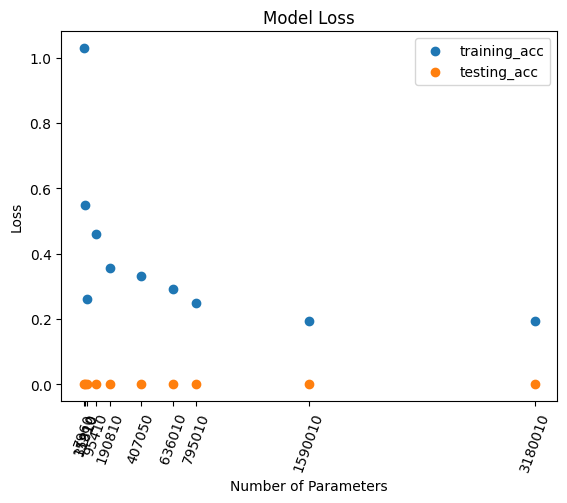

In [23]:
plt.scatter(num_of_param_per_models, training_loss_arr, label="training_acc")
plt.scatter(num_of_param_per_models, testing_loss_arr, label="testing_acc")
plt.xticks(num_of_param_per_models, num_of_param_per_models, rotation=70)
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()

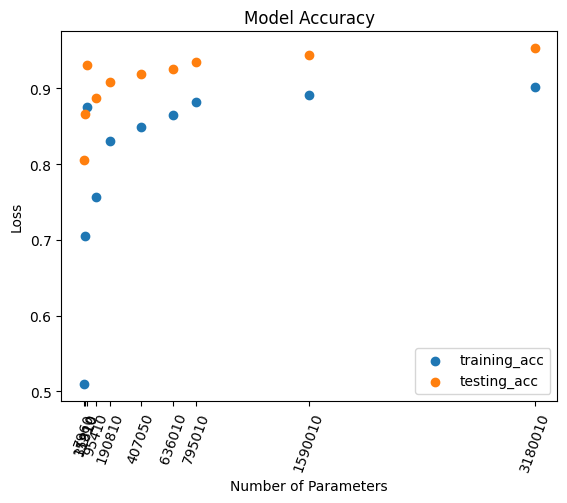

In [24]:
plt.scatter(num_of_param_per_models, training_acc_arr, label="training_acc")
plt.scatter(num_of_param_per_models, testing_acc_arr, label="testing_acc")
plt.xticks(num_of_param_per_models, num_of_param_per_models, rotation=70)
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.title("Model Accuracy")
plt.legend()
plt.show()

In [18]:
for idx, model in enumerate(models):
    print(
        "Model "
        + str(idx + 1)
        + ": "
        + str(sum(param.numel() for param in model.parameters()))
    )

Model 1: 7960
Model 2: 15910
Model 3: 636010
Model 4: 31810
Model 5: 95410
Model 6: 190810
Model 7: 407050
Model 8: 795010
Model 9: 1590010
Model 10: 3180010
